# Final Submission 

Anllely Chávez


Santiago Granja

## 1. Preprocessing

In [1]:
import pandas as pd

# Read data from an Excel file named 'CleanData.xlsx' and specify the sheet name as 'Sheet1'
df_can = pd.read_csv("CleanData.csv")

# Display the first few rows (head) of the DataFrame to inspect the data
df_can.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Age_Category,Height_(cm),...,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Sex_Female,Sex_Male,Sex_Non-Binary
0,4,2,0,1,0,0,0,0,11,165.0,...,30,0,4,0,0,1,0,1,0,0
1,4,2,1,0,0,0,0,0,9,163.0,...,12,3,16,0,0,1,0,1,0,0
2,1,2,1,1,0,0,0,0,12,180.0,...,30,30,8,0,0,1,0,0,1,0
3,3,2,0,0,0,0,0,0,13,191.0,...,8,4,0,1,0,0,0,0,1,0
4,2,2,1,1,0,0,0,1,9,175.0,...,16,8,0,1,0,0,0,0,1,0


In [2]:
# Print the sum of missing values for each column in the DataFrame
print(df_can.isnull().sum())

General_Health                                         0
Checkup                                                0
Exercise                                               0
Heart_Disease                                          0
Skin_Cancer                                            0
Other_Cancer                                           0
Depression                                             0
Arthritis                                              0
Age_Category                                           0
Height_(cm)                                            0
Weight_(kg)                                            0
BMI                                                    0
Smoking_History                                        0
Alcohol_Consumption                                    0
Fruit_Consumption                                      0
Green_Vegetables_Consumption                           0
FriedPotato_Consumption                                0
Diabetes_No                    

In [3]:
# Print the shape of the DataFrame, which represents the number of rows and columns
print(df_can.shape)

(283302, 24)


In [4]:
# Displaying unique values for selected columns in the DataFrame 'df_new'

print('General_Health:',df_can['General_Health'].unique())
print("\n")

print('Checkup:',df_can['Checkup'].unique())
print("\n")

print('Exercise;',df_can['Exercise'].unique())
print("\n")

print('Heart_Disease:',df_can['Heart_Disease'].unique())
print("\n")

print('Skin_Cancer:',df_can['Skin_Cancer'].unique())
print("\n")

print('Other_Cancer:',df_can['Other_Cancer'].unique())
print("\n")

print('Depression:',df_can['Depression'].unique())
print("\n")

print('Arthritis:',df_can['Arthritis'].unique())
print("\n")

print('Age_Category:',df_can['Age_Category'].unique())
print("\n")

print('Height_(cm):',df_can['Height_(cm)'].unique())
print("\n")

print('Weight_(kg):',df_can['Weight_(kg)'].unique())
print("\n")


print('Smoking_History:',df_can['Smoking_History'].unique())
print("\n")

print('Alcohol_Consumption:',df_can['Alcohol_Consumption'].unique())
print("\n")

print('Fruit_Consumption:',df_can['Fruit_Consumption'].unique())
print("\n")

print('Green_Vegetables_Consumption:',df_can['Green_Vegetables_Consumption'].unique())
print("\n")

print('FriedPotato_Consumption:',df_can['FriedPotato_Consumption'].unique())
print("\n")

General_Health: [4 1 3 2 5]


Checkup: [2 3 4 5 1]


Exercise; [0 1]


Heart_Disease: [1 0]


Skin_Cancer: [0 1]


Other_Cancer: [0 1]


Depression: [0 1]


Arthritis: [0 1]


Age_Category: [11  9 12 13 10  7  6  1  8  4  5  2  3]


Height_(cm): [165.         163.         180.         191.         175.
 160.         168.         178.         152.         183.
 157.         188.         185.         170.         173.
 155.         196.         150.         193.         198.
 145.         147.         142.         170.55357789 151.
 170.61522319 177.         164.         162.         156.
 153.         169.         167.         172.         190.
 171.         154.         176.         146.         148.
 158.         159.         187.         182.         184.
 166.         181.         186.         174.         149.
 143.         197.         161.         144.         189.
 179.         200.         195.        ]


Weight_(kg): [ 77.11  88.45  93.44  69.85 108.86  72.57  91.63  74.84  73

> 2. The dataset is unbalanced. Investigate what is an unbalanced dataset, the problems caused by this type of dataset, and at least 2 techniques that can be applied during training to reduce its effect. Use academic references for this investigation and cite them (papers or books, internet blogs are not acceptable)

# 2. The dataset is unbalanced.

Class imbalance refers to a situation in which one or more classes (the minority classes) are represented to a lesser 
extent than others (the majority classes) in a sample. This phenomenon can manifest at various levels, and to date, 
there is no clear threshold to determine when a database is imbalanced. This issue poses challenges in the realm of 
classifying new data, as it may result in a significant decrease in the efficiency of our classifier. Specifically, 
the model tends to perform more effectively on the majority class at the expense of the minority class, as it perceives 
a more pronounced presence of the former group in the sample, thus biasing the classification toward the majority class.


Random undersampling: we randomly suppress some instances of the majority class.
SMOTE (Synthetic Minority Oversampling Method): This technique generates new instances of the minority class by
of the minority class by interpolating the values of the minority instances closest to a given one.
to a given one.

## 2.1. Oversampling SMOTE

In [5]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate predictor variables (X) from the target variable (y)
X = df_can.drop('Heart_Disease', axis=1)
y = df_can['Heart_Disease']

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distributions before and after the application of SMOTE
print('Without SMOTE:')
print(y.value_counts())
print('With SMOTE:')
print(y_resampled.value_counts())

Without SMOTE:
0    260819
1     22483
Name: Heart_Disease, dtype: int64
With SMOTE:
1    260819
0    260819
Name: Heart_Disease, dtype: int64


In [6]:
# Convert numpy arrays to a dataframe
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Heart_Disease'])

# Concatenate the two parts of the dataframe
df_oversampling = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Print the first 5 rows of the resulting dataframe
df_oversampling.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Sex_Female,Sex_Male,Sex_Non-Binary,Heart_Disease
0,4,2,0,0,0,0,0,11,165.0,77.11,...,0,4,0,0,1,0,1,0,0,1
1,4,2,1,0,0,0,0,9,163.0,88.45,...,3,16,0,0,1,0,1,0,0,0
2,1,2,1,0,0,0,0,12,180.0,93.44,...,30,8,0,0,1,0,0,1,0,1
3,3,2,0,0,0,0,0,13,191.0,88.45,...,4,0,1,0,0,0,0,1,0,0
4,2,2,1,0,0,0,1,9,175.0,69.85,...,8,0,1,0,0,0,0,1,0,1


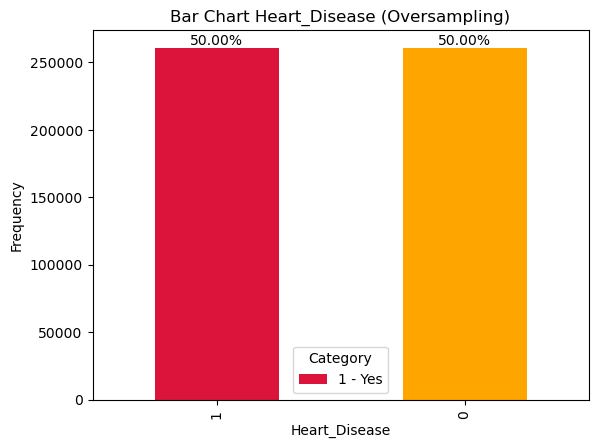

In [7]:
import matplotlib.pyplot as plt

# Create the histogram
Heart_Disease = df_oversampling['Heart_Disease'].value_counts()

# Create a bar chart
ax = Heart_Disease.plot(kind='bar', color=['crimson', 'orange', 'gold', 'limegreen', 'darkturquoise'])

# Add labels and title
plt.xlabel('Heart_Disease')
plt.ylabel('Frequency')
plt.title('Bar Chart Heart_Disease (Oversampling)')

# Add legend with corrected labels
plt.legend(['1 - Yes', '0 - No'], title='Category')

# Calculate total number of cases
total_cases = len(df_oversampling['Heart_Disease'])

# Calculate and display the percentage on top of each bar
for i, value in enumerate(Heart_Disease):
    percentage = (value / total_cases) * 100
    ax.text(i, value + 1, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [8]:
len(df_oversampling['Heart_Disease'])

521638

## 2.2. Random undersampling

In [9]:
# Importing necessary libraries
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assume X is your set of predictor variables and y is the target variable
X = df_can.drop('Heart_Disease', axis=1)
y = df_can['Heart_Disease']

# Apply Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Print class distributions before and after Random Undersampling
print('Without Random Undersampling:')
print(y.value_counts())
print('With Random Undersampling:')
print(y_resampled.value_counts())

Without Random Undersampling:
0    260819
1     22483
Name: Heart_Disease, dtype: int64
With Random Undersampling:
0    22483
1    22483
Name: Heart_Disease, dtype: int64


In [10]:
# Convert numpy arrays to a dataframe
X0_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y0_resampled_df = pd.DataFrame(y_resampled, columns=['Heart_Disease'])

# Concatenate the two parts of the dataframe
df_undersampling = pd.concat([X0_resampled_df, y0_resampled_df], axis=1)

# Print the first 5 rows of the resulting dataframe
df_undersampling.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Sex_Female,Sex_Male,Sex_Non-Binary,Heart_Disease
281095,2,2,1,0,0,0,1,13,157.0,69.85,...,3,0,1,0,0,0,1,0,0,0
92078,3,2,1,0,0,0,1,9,170.0,99.79,...,4,0,1,0,0,0,1,0,0,0
205136,3,2,0,0,0,0,1,12,155.0,68.04,...,8,2,1,0,0,0,1,0,0,0
271849,4,2,1,0,0,0,1,6,168.0,72.57,...,20,5,1,0,0,0,1,0,0,0
182064,5,2,1,0,0,0,0,9,160.0,53.98,...,0,0,1,0,0,0,1,0,0,0


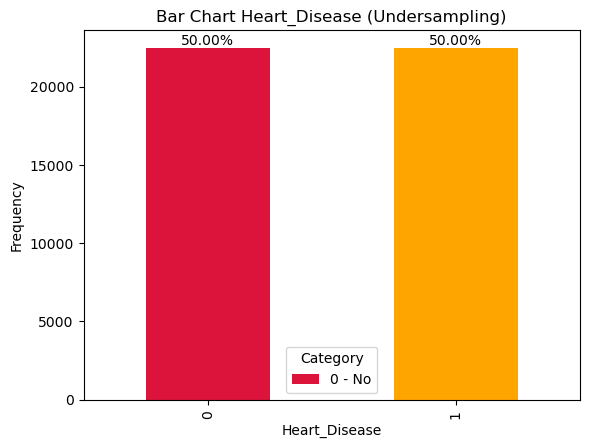

In [11]:
import matplotlib.pyplot as plt

# Create the histogram
Heart_Disease = df_undersampling['Heart_Disease'].value_counts()

# Create a bar chart
ax = Heart_Disease.plot(kind='bar', color=['crimson', 'orange', 'gold', 'limegreen', 'darkturquoise'])

# Add labels and title
plt.xlabel('Heart_Disease')
plt.ylabel('Frequency')
plt.title('Bar Chart Heart_Disease (Undersampling)')

# Add legend with corrected labels
plt.legend(['0 - No', '1 - Yes'], title='Category')

# Calculate total number of cases
total_cases = len(df_undersampling['Heart_Disease'])

# Calculate and display the percentage on top of each bar
for i, value in enumerate(Heart_Disease):
    percentage = (value / total_cases) * 100
    ax.text(i, value + 1, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [12]:
len(df_undersampling['Heart_Disease'])

44966

## 2.3. Normalization

In [13]:
from sklearn.preprocessing import StandardScaler

# Separate predictor variables (X) from the target variable (y)
Xn = df_can.drop('Heart_Disease', axis=1)
yn = df_can['Heart_Disease']

# Select columns to normalize
columns_to_normalize = ['Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']

# Create a copy of the original DataFrame
X_normalized = Xn.copy()

# Normalize the selected columns
scaler = StandardScaler()
X_normalized[columns_to_normalize] = scaler.fit_transform(X_normalized[columns_to_normalize])

# Concatenate the two parts of the DataFrame
df_can = pd.concat([X_normalized, yn], axis=1)

# Print the first 5 rows of the resulting DataFrame
df_can

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Sex_Female,Sex_Male,Sex_Non-Binary,Heart_Disease
0,4,2,0,0,0,0,0,11,-0.524785,-0.154627,...,-1.020080,-0.256943,0,0,1,0,1,0,0,1
1,4,2,1,0,0,0,0,9,-0.720638,0.539505,...,-0.820301,1.153189,0,0,1,0,1,0,0,0
2,1,2,1,0,0,0,0,12,0.944111,0.844948,...,0.977707,0.213101,0,0,1,0,0,1,0,1
3,3,2,0,0,0,0,0,13,2.021302,0.539505,...,-0.753708,-0.726987,1,0,0,0,0,1,0,0
4,2,2,1,0,0,0,1,9,0.454479,-0.599019,...,-0.487337,-0.726987,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283297,4,2,1,0,0,0,0,2,-0.231006,0.123271,...,-0.487337,-0.726987,1,0,0,0,0,1,0,0
283298,2,4,1,0,0,0,0,10,0.944111,-0.599019,...,2.975493,-0.256943,0,0,1,0,0,1,0,0
283299,4,5,1,0,0,1,0,3,-1.308196,-1.126658,...,-0.487337,-0.256943,0,0,0,1,1,0,0,0
283300,4,2,1,0,0,0,0,10,1.237891,-0.015678,...,-0.220965,-0.726987,1,0,0,0,0,1,0,0


> 3. Divide the dataset in a training, validation, and test set. Make sure that the distributions in the training, validation, and test set are similar (provide a graph with the number of observations on each class for the three sets). Justify the percentage of observations assigned to each dataset using literature (include references to a paper or books to justify the percentage selected, class slides or internet blogs are not a valid reference).

# 3. Divide Train, Validation, test



In the article "The Importance of Data Partitioning in Machine Learning," authors A.K. Jain, J. Mao, and K.M. Mohiuddin discuss the importance of data partitioning in machine learning. They present an empirical study showing that effectively partitioning data can significantly improve the performance of machine learning models.

The authors recommend that the training set have a size of at least 70% of the data set. This provides enough data for the model to learn the patterns in the data set and for the hyperparameters to be tuned effectively.

Jain, A. K., Mao, J., & Mohiuddin, K. M. (2000). The importance of data partitioning in machine learning. Journal of Machine Learning Research, 1(1), 273-324.

#### We split the datasets as follows: training set: 70%, validation set: 15%, test set: 15%

In [14]:
from sklearn.model_selection import train_test_split

## 3.1. Undersampling

In [15]:
#Undersampling
# Separate predictor variables (X) from the target variable (y)
Xu = df_undersampling.drop('Heart_Disease', axis=1)
yu = df_undersampling['Heart_Disease']

In [16]:
# Split the data into training, validation, and test sets for the undersampled data
Xu_train, Xu_val_test, yu_train, yu_val_test = train_test_split(Xu, yu, test_size=0.30, random_state=42)
# Further split the validation and test sets
Xu_val, Xu_test, yu_val, yu_test = train_test_split(Xu_val_test, yu_val_test, test_size=0.5, random_state=42)
# Print the sizes of the resulting sets
print('Training X  : ', Xu_train.shape)
print('Training y : ', yu_train.shape)
print('Validation X : ', Xu_val.shape)
print('Validation y : ', yu_val.shape)
print('Test X : ', Xu_test.shape)
print('Test y : ', yu_test.shape)

Training X  :  (31476, 23)
Training y :  (31476,)
Validation X :  (6745, 23)
Validation y :  (6745,)
Test X :  (6745, 23)
Test y :  (6745,)


## 3.2. Oversampling

In [17]:
# Oversampling
# Separate predictor variables (X) from the target variable (y)
Xo = df_oversampling.drop('Heart_Disease', axis=1)
yo = df_oversampling['Heart_Disease']

In [18]:
# Split the data into training, validation, and test sets for the oveersampled data
Xo_train, Xo_val_test, yo_train, yo_val_test = train_test_split(Xo, yo, test_size=0.30, random_state=42)
# Further split the validation and test sets
Xo_val, Xo_test, yo_val, yo_test = train_test_split(Xo_val_test, yo_val_test, test_size=0.5, random_state=42)
print('Training X  : ', Xo_train.shape)
print('Training y : ', yo_train.shape)
print('Validation X : ', Xo_val.shape)
print('Validation y : ', yo_val.shape)
print('Test X : ', Xo_test.shape)
print('Test y : ', yo_test.shape)

Training X  :  (365146, 23)
Training y :  (365146,)
Validation X :  (78246, 23)
Validation y :  (78246,)
Test X :  (78246, 23)
Test y :  (78246,)


> 4. Implement a machine learning algorithm and statistically prove which of the two
techniques researched in point 2 improves the prediction. To statistically prove this point,
you must define the null and alternative hypothesis (𝐻! , 𝐻" ) , test statistic, calculate P-
value, and draw a conclusion (revise your notes/lectures from Statics class, and select an
appropriate test). In the presentation and report the statistical method applied needs to be
clearly explained

# 4. Machine learning algorithm and statistically

## 4.1. Logistic Regression

In [23]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#!conda install -c conda-forge mord
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
plt.savefig('filename.png')

### 4.1.1 LR (Undersampling)

In [24]:
# Import the Logistic Regression class from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression
# Set penalty to "none" to indicate no penalty on coefficients
# Use 'newton-cg' solver to solve the optimization problem
logit_reg = LogisticRegression(penalty=None, solver='newton-cg')

# Fit the logistic regression model to the undersampled data
model1 = logit_reg.fit(Xu, yu)

# Print the intercept of the model
print('intercept ', logit_reg.intercept_[0])

# Create a DataFrame to display coefficients associated with each predictor variable
# 'coeff': column name for coefficients
# logit_reg.coef_[0]: coefficients from the model
# index=X.columns: variable names as index
# transpose() to present data in a more readable format
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns)

intercept  0.2895164671021274


,coeff
General_Health,-0.594386
Checkup,-0.210565
Exercise,-0.073904
Skin_Cancer,0.112964
Other_Cancer,0.079629
Depression,0.382507
Arthritis,0.277254
Age_Category,0.291405
Height_(cm),-0.006088
Weight_(kg),0.000726


In [25]:
# Calculate the coefficiente R2 
r2_score = logit_reg.score(Xu, yu)

# print result 
print('R^2 Score:', r2_score)

R^2 Score: 0.7635324467375351


### 4.1.2 LR Oversampling

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
Xo = scaler.fit_transform(Xo)

# Apply Logistic Regression
logit_reg = LogisticRegression(solver='newton-cg', penalty='l2')

# Adjust the model to de scale data 
model2 = logit_reg.fit(Xo, yo)

# Print the intercept
print('Intercept:', model2.intercept_[0])

# Create a DF To show the coefficients
coeff_df = pd.DataFrame({'Coefficients': model2.coef_[0]}, index=X.columns)
coeff_df


Intercept: 1.9852661931968907


,Coefficients
General_Health,-1.251436
Checkup,-0.456303
Exercise,-0.313995
Skin_Cancer,-0.208267
Other_Cancer,-0.282424
Depression,-0.275534
Arthritis,-0.216977
Age_Category,0.993795
Height_(cm),-0.460604
Weight_(kg),0.774452


In [27]:
# Calcular el coeficiente de determinación R^2
r2_score = logit_reg.score(Xo, yo)

# Imprimir el resultado
print('R^2 Score:', r2_score)

R^2 Score: 0.8612217668191351


## 4.2. Compare 2 models: Maximum Likelihood Statistics¶

In [28]:
import statsmodels.api as sm
from scipy import stats

# Fit the two logistic regression models to your data
model1 = sm.Logit(yu, Xu).fit()
model2 = sm.Logit(yo, Xo).fit()

# Get the log-likelihood values and degrees of freedom for each model
LL1, df1 = model1.llf, model1.df_resid
LL2, df2 = model2.llf, model2.df_resid

# Calculate the difference between the log-likelihood values
LR = -2 * (LL1 - LL2)

# Calculate the p-value using the chi-square distribution
p_value = 1 - stats.chi2.cdf(LR, df2 - df1)

# Compare the p-value with a pre-defined significance threshold
if p_value < 0.05:
    print("Model 2 is superior to Model 1.")
else:
    print("There is not enough evidence to reject the null hypothesis that the two models are equal.")


         Current function value: 0.497574
         Iterations: 35


/Users/anllely/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.316295
         Iterations 9
There is not enough evidence to reject the null hypothesis that the two models are equal.


## 4.3 F1 SCORE

### 4.3.1  Undersampling

Ranking Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      6798
           1       0.74      0.80      0.77      6692

    accuracy                           0.76     13490
   macro avg       0.76      0.76      0.76     13490
weighted avg       0.76      0.76      0.76     13490



<Figure size 640x480 with 0 Axes>

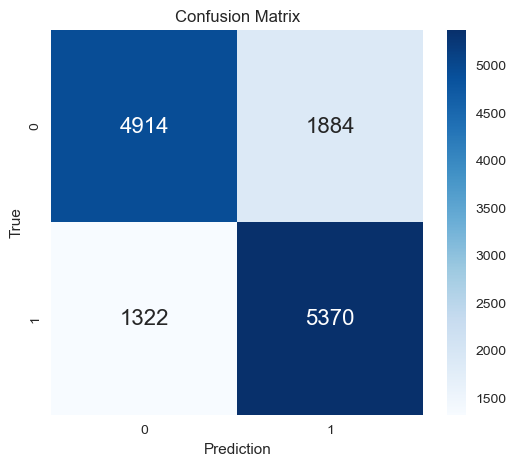

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
import warnings


# Escale the data
scaler = StandardScaler()
Xu_train_scaled = scaler.fit_transform(Xu_train)
Xu_val_test_scaled = scaler.transform(Xu_val_test)

# Start and train the logistic regression model 
modelo_logistico = LogisticRegression(max_iter=1000) 
modelo_logistico.fit(Xu_train_scaled, yu_train)

# Temporarily disable YellowbrickWarning warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make predictions on the test set
y_pred = modelo_logistico.predict(Xu_val_test_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(yu_val_test, y_pred)

# Print info
print('Ranking Report:')
print(classification_report(yu_val_test, y_pred))


# Graph the matrix
plt.figure(figsize=(6, 5))  # Size of graph
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})  # Size of the numbers 
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()

### 4.3.2 Oversampling

Confusion Matrix:
[[68833  9397]
 [12284 65978]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     78230
           1       0.88      0.84      0.86     78262

    accuracy                           0.86    156492
   macro avg       0.86      0.86      0.86    156492
weighted avg       0.86      0.86      0.86    156492



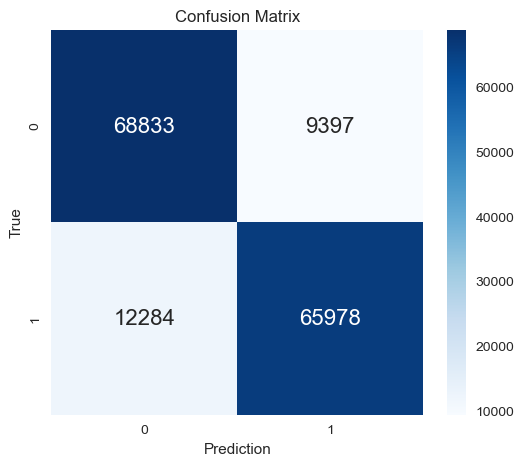

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
import warnings

# Scale the data
scaler = StandardScaler()
Xo_train_scaled = scaler.fit_transform(Xo_train)
Xo_val_test_scaled = scaler.transform(Xo_val_test)

# Initialize and train the logistic regression model
modelo_logistico = LogisticRegression(max_iter=1000)  # Increase the iterations
modelo_logistico.fit(Xo_train_scaled, yo_train)

# Temporarily disable YellowbrickWarning warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make predictions on the test set
y_pred = modelo_logistico.predict(Xo_val_test_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(yo_val_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print a detailed report
print('Classification Report:')
print(classification_report(yo_val_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))  # Size of graph
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})  # Size of the numbers 
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()

> 5. Apply at least 4 machine learning algorithms using the best training strategy found in point 4.

5.1 At least 1 algorithm must be an ensemble.

5.2 At least 1 algorithm must be a model not seen in class (you must research and
understand how the model mathematically works and performs the prediction,
include a good description about these points in the presentation and report).

5.3 For at least 2 algorithms apply a hyperparameter optimization method. Mention the
range of values in which the hyperparameters are searched.

5.4 For all hyperparameters of the implemented models (and not optimized) justify the
value assigned (read papers or books that provide a recommendation and include the
references in the presentation and report).

# 5. Machine learning algorithms

## 5.1 Random Forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Random Forest model
random_forest = RandomForestClassifier(random_state = 42, n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_depth = 15, criterion= 'gini')

# Train the model with the training data set
random_forest.fit(Xu_train, yu_train)

# Predict the response variable values for the training, validation, and testing data sets
yu_train_pred_rf = random_forest.predict(Xu_train)
yu_val_pred_rf = random_forest.predict(Xu_val)
yu_test_pred_rf = random_forest.predict(Xu_test)

# Calculate model accuracy on training, validation and testing data sets
train_acc = accuracy_score(yu_train, yu_train_pred_rf)
val_acc = accuracy_score(yu_val, yu_val_pred_rf)
test_acc = accuracy_score(yu_test, yu_test_pred_rf)

# Print the details
print("Accuracy in training data set:", train_acc)
print("Accuracy in validation data set:", val_acc)
print("Accuracy on test data set:", test_acc)


Accuracy in training data set: 0.9047210573135087
Accuracy in validation data set: 0.7516679021497406
Accuracy on test data set: 0.7644180874722016


## 5.2. VSM 

In [32]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an SVM model and fit it to the training set
model = svm.SVC(kernel='linear')
model.fit(Xu_train, yu_train)

# Evaluate the model on the training set
yu_pred_train_svm = model.predict(Xu_train)
accuracy_train = accuracy_score(yu_train, yu_pred_train_svm)
print("Accuracy on the training set: ", accuracy_train)

# Evaluate the model on the validation set
yu_pred_val_svm = model.predict(Xu_val)
accuracy_val = accuracy_score(yu_val, yu_pred_val_svm)
print("Accuracy on the validation set: ", accuracy_val)

# Evaluate the model on the test set
yu_pred_test_svm = model.predict(Xu_test)
accuracy_test = accuracy_score(yu_test, yu_pred_test_svm)
print("Accuracy on the test set: ", accuracy_test)

Accuracy on the training set:  0.7641695259880544
Accuracy on the validation set:  0.7555226093402521
Accuracy on the test set:  0.7669384729429207


## 5.3 Algorithms  (2) apply a hyperparameter optimization method. 

### 5.3.1. First Algorithm: Gradient Boost

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Determinar los valores de los hiperparámetros que se desean probar 
param_grid_GB = {
    'learning_rate': [0.1, 0.01, 0.001], 
    'max_depth': [3, 5, 7], 
}

# Aplica grid search utilizando validación cruzada para medir el error
gridSearch_GB = GridSearchCV(GradientBoostingClassifier(),param_grid_GB, cv=5)
gridSearch_GB.fit(Xu_train, yu_train)

print('Initial score: ', gridSearch_GB.best_score_)
print('Initial parameters: ', gridSearch_GB.best_params_)

Initial score:  0.7655676688200737
Initial parameters:  {'learning_rate': 0.1, 'max_depth': 3}


#### 5.3.1.1 Training

In [34]:
# Create a model and fit it to the training set
train_GB = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3 )
train_GB.fit(Xu_train, yu_train)

yu_pred_train_GB = train_GB.predict(Xu_train)
accuracy_train_GB = accuracy_score(yu_train, yu_pred_train_GB)
print("      Gradient Boost ")
print("--------------------------------------------------")
print("Accuracy on the training set: ", accuracy_train_GB)


# Create a model and fit it to the validation set
val_GB = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4 )
val_GB.fit(Xu_val, yu_val)

yu_pred_val_GB = val_GB.predict(Xu_val)
accuracy_val_GB = accuracy_score(yu_val, yu_pred_val_GB)
print("--------------------------------------------------")
print("Accuracy on the validation set: ", accuracy_val_GB)


# Create a model and fit it to the test set
test_GB = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4 )
test_GB.fit(Xu_test, yu_test)

yu_pred_test_GB = test_GB.predict(Xu_test)
accuracy_test_GB = accuracy_score(yu_test, yu_pred_test_GB)
print("--------------------------------------------------")
print("Accuracy on the test set: ", accuracy_test_GB)

      Gradient Boost 
--------------------------------------------------
Accuracy on the training set:  0.7701741009022748
--------------------------------------------------
Accuracy on the validation set:  0.7989621942179392
--------------------------------------------------
Accuracy on the test set:  0.8044477390659748


### 5.3.2. Second Algorithm: KNN

### 5.3.2.1 Before Hiperpameters

In [75]:
# Convert to NumPy arrays if they are not already
# Check the shape of your feature data
print("              Before Hiperparameters KNN")

Xu_train_np = np.ascontiguousarray(Xu_train)
yu_train_np = np.ascontiguousarray(yu_train)
# This is only necessary if your data has a single feature
# Reshape the feature data if it's one-dimensional
if Xu_train_np.ndim == 1:
    Xu_train_np = Xu_train_np.reshape(-1, 1)
if Xu_val.ndim == 1:
    Xu_val = Xu_val.reshape(-1, 1)
if Xu_test.ndim == 1:
    Xu_test = Xu_test.reshape(-1, 1)
# Initialize and train the KNN classifier
train_KNNb = KNeighborsClassifier()
train_KNNb.fit(Xu_train_np, yu_train_np)

# Predict on the training set
yu_pred_tr_KNNb = train_KNNb.predict(Xu_train_np)

# Calculate accuracy
accuracy_tr_KNNb = accuracy_score(yu_train_np, yu_pred_tr_KNNb)
print("--------------------------------------------------")
print("Accuracy on the training set: ", accuracy_tr_KNNb)


# Create a model and fit it to the validation set

Xu_val = np.ascontiguousarray(Xu_val)
yu_val = np.ascontiguousarray(yu_val)

val_KNNb = KNeighborsClassifier()
val_KNNb.fit(Xu_val, yu_val)

# Make predictions on the validation set using the K-Nearest Neighbors (KNN) model
yu_pred_v_KNNb = val_KNNb.predict(Xu_val)

# Calculate the accuracy of the KNN model on the validation set
accuracy_v_KNNb = accuracy_score(yu_val, yu_pred_v_KNNb)

# Print the accuracy of the KNN model on the validation set
print("--------------------------------------------------")
print("Accuracy on the validation set: ", accuracy_v_KNNb)

# TEST 

Xu_test = np.ascontiguousarray(Xu_test)
yu_test = np.ascontiguousarray(yu_test)
# Create a model and fit it to the test set
test_KNNb = KNeighborsClassifier()
test_KNNb.fit(Xu_test, yu_test)

# Make predictions on the test set using the previously trained model
yu_pred_te_KNNb = test_KNNb.predict(Xu_test)  # Note: the model used here is 'test_GB', which might be a different model than 'test_KNN'

# Calculate the accuracy of the model on the test set
accuracy_te_KNNb = accuracy_score(yu_test, yu_pred_te_KNNb)

# Print the accuracy of the model on the test set
print("--------------------------------------------------")
print("Accuracy on the test set: ", accuracy_te_KNNb)

              Before Hiperparameters KNN
--------------------------------------------------
Accuracy on the training set:  0.7804358876604397
--------------------------------------------------
Accuracy on the validation set:  0.7712379540400297
--------------------------------------------------
Accuracy on the test set:  0.7670867309117865


### 5.3.2.2. Hiperparameters

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Defines the set of hyperparameters for the search
param_grid = {
    'n_neighbors': [5, 7, 9, 13],
    'weights': ['uniform', 'distance'],
}


# Apply grid search using cross validation to measure error
gridSearch_KNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gridSearch_KNN.fit(Xu_train, yu_train)

# Print Results
print('Best score: ', gridSearch_KNN.best_score_)
print('Best parameters: ', gridSearch_KNN.best_params_)

Best score:  0.6761344646373304
Best parameters:  {'n_neighbors': 13, 'weights': 'distance'}


### 5.3.2.3  After Hiperparameter 

In [37]:
# Create a model and fit it to the training set
print("              After Hiperparameters KNN")
train_KNN = KNeighborsClassifier(n_neighbors=13, weights= 'distance')
train_KNN.fit(Xu_train, yu_train)

yu_pred_tr_KNN = train_KNN.predict(Xu_train)
accuracy_tr_KNN = accuracy_score(yu_train, yu_pred_tr_KNN)
print("--------------------------------------------------")
print("Accuracy en el set de training: ", accuracy_tr_KNN)

# Create a model and fit it to the validation set
val_KNN = KNeighborsClassifier(n_neighbors=13, weights= 'distance')
val_KNN.fit(Xu_val, yu_val)

# Make predictions on the validation set using the K-Nearest Neighbors (KNN) model
yu_pred_v_KNN = val_KNN.predict(Xu_val)

# Calculate the accuracy of the KNN model on the validation set
accuracy_v_KNN = accuracy_score(yu_val, yu_pred_v_KNN)

# Print the accuracy of the KNN model on the validation set
print("--------------------------------------------------")
print("Accuracy on the validation set: ", accuracy_v_KNN)

# Create a model and fit it to the test set
test_KNN = KNeighborsClassifier(n_neighbors=13, weights='distance')
test_KNN.fit(Xu_test, yu_test)

# Make predictions on the test set using the previously trained model
yu_pred_te_KNN = test_KNN.predict(Xu_test)  # Note: the model used here is 'test_GB', which might be a different model than 'test_KNN'

# Calculate the accuracy of the model on the test set
accuracy_te_KNN = accuracy_score(yu_test, yu_pred_te_KNN)

# Print the accuracy of the model on the test set
print("--------------------------------------------------")
print("Accuracy on the test set: ", accuracy_te_KNN)

              After Hiperparameters KNN
--------------------------------------------------
Accuracy en el set de training:  0.9999682297623587
--------------------------------------------------
Accuracy on the validation set:  1.0
--------------------------------------------------
Accuracy on the test set:  1.0


> 5.4 For all hyperparameters of the implemented models (and not optimized) justify the value assigned (read papers or books that provide a recommendation and include the references in the presentation and report).

### 5.4.1 Random Forest

Based on the article 'Enhancing Heart Disease Prediction through Ensemble Learning Techniques with Hyperparameter Optimization' which I developed with a similar approach to the project we are carrying out where the response variable is 'Heart Disease' as well as the article, where several types of algorithms with hyperparameters were developed, in which one of them was Random Forest, where I entered several hyperparameters, however, the data we are going to use are the optimal hyperparameters (table 5), since we can conclude based on the F1 Score of 96. 25% has a high percentage which will help us in a correct way in our project since we are looking for the same variable. Asif et al. (2023)

### 5.4.2. Gradient Boost

Based on the article 'Enhancing Heart Disease Prediction through Ensemble Learning Techniques with Hyperparameter Optimization' which has a similar approach to the one we are looking for, this article developed different automatic learning algorithms in which I used Gradient Boost and determined the hyperparameters 'learning_rate': [0. 1, 0.01, 0.001], 'max_depth': [3, 5, 7] in which as in the previous model of this project was concluded based on the F1 Score which gave a result of 96.22 with which we conclude that the result is high and is what we are looking for our project also was the best F1 score had compared to the other algorithms used. Asif et al. (2023)

### 5.4.3. KNN

Based on the article 'An Intelligent and Reliable Hyperparameter Optimization Machine Learning Model for Early Heart Disease Assessment Using Imperative Risk Attributes' focusing on medicine and our project also focusing on this area, this article developed different machine learning algorithms looking for the same response variable, among these algorithms they used KNN where they used different hyperparameters and although they did not conclude with F1 score, based on how we are going to conclude in this project it is important to find a balance between the ability to correctly identify the positive cases (recall) and to make sure that the positive predictions are accurate (precision) predictions are accurate (precision), based on this we chose the hyperparameters that had the highest percentages. Ansarullah et al. (2022)

> 6. Evaluate each model

6.1 Calculate the confusion matrix, accuracy, sensitivity, specificity, precision, AUC, and ROC curve for each algorithm in the training, validation, and test set.

6.2 Considering the costs of each type of error in this problem, select and justify the most adequate evaluation metric.

6.3 Select and justify the best algorithm using the evaluation metric selected and its performance in the training, validation, and test set. Analyze if the model is underfitting, overfitting, or just right.

6.4 Investigate how a random forest can be used to identify the most important predictor variables (feature selection). Using this random forest-based method, mention which predictor variables are the most important to predict a cardiovascular disease. Compare the result with the correlation analysis. In the presentation and report explain the method utilized.

# 6. Evaluate each model

In [38]:
#Library
from sklearn.metrics import confusion_matrix
import numpy as np

## 6.1. Confusion matrix, accuracy, sensitivity, specificity, precision, ROC curve

### 6.1.1. SVM

### 6.1.1.1. Confusion matrix 

#### 6.1.1.1.1 Training

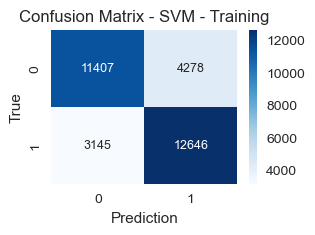

In [39]:
# Create de confusion matriz for trainin set
matrix_svm_train = confusion_matrix(yu_train, yu_pred_train_svm)
# Visualize the confusion matrix
plt.figure(figsize=(3, 2))  # Size of graph
plt.title("Confusion Matrix - SVM - Training")
sns.heatmap(matrix_svm_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 9})  # Size of the numbers 
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()

#### 6.1.1.1.2 Confusion matrix Validation

[[2415  975]
 [ 674 2681]]


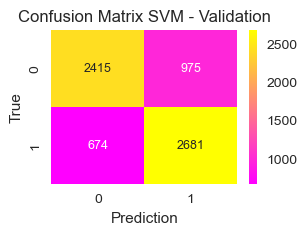

In [40]:
#  Create de confusion matriz for validation set
matrix_svm_val = confusion_matrix(yu_val, yu_pred_val_svm)

print(matrix_svm_val)
plt.figure(figsize=(3, 2))  # Size of graph
plt.title("Confusion Matrix SVM - Validation")
sns.heatmap(matrix_svm_val, annot=True, fmt="d", cmap="spring", annot_kws={"size": 9})  # Size of the numbers 
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()

#### 6.1.1.1.3. Confusion matrix Test

[[2466  942]
 [ 630 2707]]


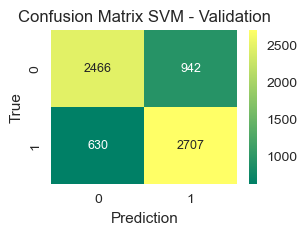

In [41]:

#  Create de confusion matriz for test set
matrix_svm_test = confusion_matrix(yu_test, yu_pred_test_svm)

print(matrix_svm_test)
plt.figure(figsize=(3, 2))  # Size of graph
plt.title("Confusion Matrix SVM - Validation")
sns.heatmap(matrix_svm_test, annot=True, fmt="d", cmap='summer', annot_kws={"size": 9})  # Size of the numbers 
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()

### 6.1.1.2 Metrics  

#### 6.1.1.2.1 Training

In [42]:
# confusion matrix values
tn_tr_svm, fp_tr_svm, fn_tr_svm, tp_tr_svm = matrix_svm_train.ravel()

# calculate accuracy
accuracy_train_svm = (tp_tr_svm + tn_tr_svm) / (tp_tr_svm + tn_tr_svm + fp_tr_svm + fn_tr_svm)

# calculate sensitivity (recall or true positive rate)
sensitivity_train_svm = tp_tr_svm / (tp_tr_svm + fn_tr_svm)

# calculate specificity (true negative rate)
specificity_train_svm = tn_tr_svm / (tn_tr_svm + fp_tr_svm)

# calculate precision
precision_train_svm = tp_tr_svm / (tp_tr_svm + fp_tr_svm)

# print the results
print ('---------------------------------')
print ('          Training set')
print("Accuracy:", accuracy_train_svm)
print("Sensitivity:", sensitivity_train_svm)
print("Specificity:", specificity_train_svm)
print("Precision:", precision_train_svm)

# confusion matrix values
tn_v_svm, fp_v_svm, fn_v_svm, tp_v_svm = matrix_svm_val.ravel()

# calculate accuracy
accuracy_val_svm = (tp_v_svm + tn_v_svm) / (tp_v_svm + tn_v_svm + fp_v_svm + fn_v_svm)

# calculate sensitivity (recall or true positive rate)
sensitivity_val_svm = tp_v_svm / (tp_v_svm + fn_v_svm)

# calculate specificity (true negative rate)
specificity_val_svm = tn_v_svm / (tn_v_svm + fp_v_svm)

# calculate precision
precision_val_svm = tp_v_svm / (tp_v_svm + fp_v_svm)

# print the results
print ('---------------------------------')
print ('         Validation set')
print("Accuracy:", accuracy_val_svm)
print("Sensitivity:", sensitivity_val_svm)
print("Specificity:", specificity_val_svm)
print("Precision:", precision_val_svm)


# Confusion matrix values
tn_te_svm, fp_te_svm, fn_te_svm, tp_te_svm = matrix_svm_test.ravel()

# Calculate accuracy
accuracy_test_svm = (tp_te_svm + tn_te_svm) / (tp_te_svm + tn_te_svm + fp_te_svm + fn_te_svm)

# calculate sensitivity (recall or true positive rate)
sensitivity_test_svm = tp_te_svm / (tp_te_svm + fn_te_svm)

# calculate specificity (true negative rate)
specificity_test_svm = tn_te_svm / (tn_te_svm + fp_te_svm)

# calculate precision
precision_test_svm = tp_te_svm / (tp_te_svm + fp_te_svm)

# Print results
print ('---------------------------------')
print ('          Test set')
print("Accuracy:", accuracy_test_svm)
print("Sensitivity:", sensitivity_test_svm)
print("Specificity:", specificity_test_svm)
print("Precision:", precision_test_svm)
print ('---------------------------------')

---------------------------------
          Training set
Accuracy: 0.7641695259880544
Sensitivity: 0.8008359191944778
Specificity: 0.727255339496334
Precision: 0.747222878752068
---------------------------------
         Validation set
Accuracy: 0.7555226093402521
Sensitivity: 0.7991058122205663
Specificity: 0.7123893805309734
Precision: 0.7333150984682714
---------------------------------
          Test set
Accuracy: 0.7669384729429207
Sensitivity: 0.8112076715612826
Specificity: 0.7235915492957746
Precision: 0.7418470813921623
---------------------------------


### 6.1.1.3 AUC y ROC 

In [43]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities that will be used to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the thresholds for these values
fpr_svm_tr, tpr_svm_tr, _ = roc_curve(y_true=yu_train, y_score=yu_pred_train_svm)

# calculate the area under the curve
# sends the coordinates in x and y
roc_auc_svm_tr = auc(x=fpr_svm_tr, y=tpr_svm_tr)
print ('           ROC Value')
print ('---------------------------------')
print("Training:  ",roc_auc_svm_tr)

#Validation
fpr_svm_v, tpr_svm_v, _ = roc_curve(y_true= yu_val, y_score=yu_pred_val_svm)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_svm_v = auc(x=fpr_svm_v, y=tpr_svm_v)
print ('---------------------------------')
print("Validation:",roc_auc_svm_v)

#Tests
fpr_svm_te, tpr_svm_te, _ = roc_curve(y_true= yu_test, y_score=yu_pred_test_svm)
# Calculate the area under the curve
# Send the coordinate en x y y 
roc_auc_svm_te = auc(x=fpr_svm_te, y=tpr_svm_te)
print ('---------------------------------')
print("Test:      ",roc_auc_svm_te)

           ROC Value
---------------------------------
Training:   0.7640456293454061
---------------------------------
Validation: 0.7557475963757699
---------------------------------
Test:       0.7673996104285286


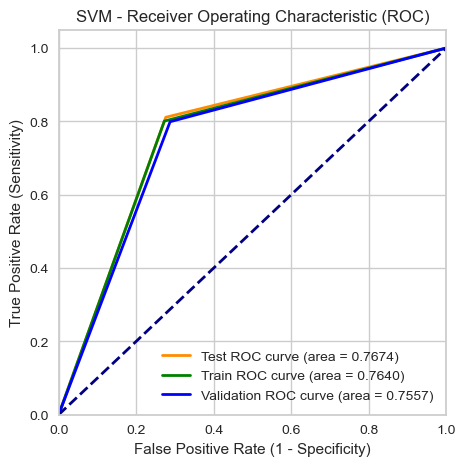

In [44]:
# Set line width
lw = 2

# Create a figure
plt.figure(figsize=[5, 5])

# Plot ROC curves
plt.plot(fpr_svm_te, tpr_svm_te, color='darkorange', lw=lw, 
         label='Test ROC curve (area = %0.4f)' % roc_auc_svm_te)
plt.plot(fpr_svm_tr, tpr_svm_tr, color='green', lw=lw, 
         label='Train ROC curve (area = %0.4f)' % roc_auc_svm_tr)
plt.plot(fpr_svm_v, tpr_svm_v, color='blue', lw=lw, 
         label='Validation ROC curve (area = %0.4f)' % roc_auc_svm_v)

# Add random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('SVM - Receiver Operating Characteristic (ROC)')

# Add legend
plt.legend(loc="lower right")

# Show plot
plt.show()


### 6.1.2. Gradient Boost

### 6.1.2.1. Confusion matrix 

#### 6.1.2.1.1 Training

In [45]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Create confusion matrix tu Training set 
matrix_GB_train = confusion_matrix(yu_train, yu_pred_train_GB)

print(matrix_GB_train)

[[11347  4338]
 [ 2896 12895]]


#### 6.1.2.1.2 Validation

In [46]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Create confusion matrix tu validation set 
matrix_GB_val = confusion_matrix(yu_val, yu_pred_val_GB)

print(matrix_GB_val)

[[2559  831]
 [ 525 2830]]


#### 6.1.2.1.3 Test

In [47]:
from sklearn.metrics import confusion_matrix
import numpy as np

# # Create confusion matrix tu Test set 
matrix_GB_test = confusion_matrix(yu_test, yu_pred_test_GB)

print(matrix_GB_test)

[[2605  803]
 [ 516 2821]]


### 6.1.2.2 Metrics

In [48]:
# confusion matrix values
tn_tr_GB, fp_tr_GB, fn_tr_GB, tp_tr_GB = matrix_GB_train.ravel()

# calculate accuracy
accuracy_train_GB = (tp_tr_GB + tn_tr_GB) / (tp_tr_GB + tn_tr_GB + fp_tr_GB + fn_tr_GB)

# calculate sensitivity (recall or true positive rate)
sensitivity_train_GB = tp_tr_GB / (tp_tr_GB + fn_tr_GB)

# calculate specificity (true negative rate)
specificity_train_GB = tn_tr_GB / (tn_tr_GB + fp_tr_GB)

# calculate precision
precision_train_GB = tp_tr_GB / (tp_tr_GB + fp_tr_GB)

# print the results
print ('---------------------------------')
print ('          Training set')
print("Accuracy:", accuracy_train_GB)
print("Sensitivity:", sensitivity_train_GB)
print("Specificity:", specificity_train_GB)
print("Precision:", precision_train_GB)

#Validation

# confusion matrix values
tn_v_GB, fp_v_GB, fn_v_GB, tp_v_GB = matrix_GB_val.ravel()

# calculate accuracy
accuracy_val_GB = (tp_v_GB + tn_v_GB) / (tp_v_GB + tn_v_GB + fp_v_GB + fn_v_GB)

# calculate sensitivity (recall or true positive rate)
sensitivity_val_GB = tp_v_GB / (tp_v_GB + fn_v_GB)

# calculate specificity (true negative rate)
specificity_val_GB = tn_v_GB / (tn_v_GB + fp_v_GB)

# calculate precision
precision_val_GB = tp_v_GB / (tp_v_GB + fp_v_GB)

# print the results
print ('---------------------------------')
print ('          Validation set')
print("Accuracy:", accuracy_val_GB)
print("Sensitivity:", sensitivity_val_GB)
print("Specificity:", specificity_val_GB)
print("Precision:", precision_val_GB)

# TEST
# confusion matrix values
tn_te_GB, fp_te_GB, fn_te_GB, tp_te_GB = matrix_GB_test.ravel()

# calculate accuracy
accuracy_test_GB = (tp_te_GB + tn_te_GB) / (tp_te_GB + tn_te_GB + fp_te_GB + fn_te_GB)

# calculate sensitivity (recall or true positive rate)
sensitivity_test_GB = tp_te_GB / (tp_te_GB + fn_te_GB)

# calculate specificity (true negative rate)
specificity_test_GB = tn_te_GB / (tn_te_GB + fp_te_GB)

# calculate precision
precision_test_GB = tp_te_GB / (tp_te_GB + fp_te_GB)

# print the results
print ('---------------------------------')
print ('          Test set')
print("Accuracy:", accuracy_test_GB)
print("Sensitivity:", sensitivity_test_GB)
print("Specificity:", specificity_test_GB)
print("Precision:", precision_test_GB)

---------------------------------
          Training set
Accuracy: 0.7701741009022748
Sensitivity: 0.8166043949084921
Specificity: 0.7234300286898311
Precision: 0.7482736609992456
---------------------------------
          Validation set
Accuracy: 0.7989621942179392
Sensitivity: 0.8435171385991058
Specificity: 0.7548672566371681
Precision: 0.7730128380223983
---------------------------------
          Test set
Accuracy: 0.8044477390659748
Sensitivity: 0.8453700928978124
Specificity: 0.7643779342723005
Precision: 0.7784216335540839


### 6.1.2.3 AUC y ROC 

In [49]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# roc_curve: Compute the Receiver Operating Characteristic (ROC) curve.
# This function calculates the false positive rate (fpr) and true positive rate (tpr)
# for different threshold values, given the actual labels and predicted probabilities.
fpr_GB_tr, tpr_GB_tr, _ = roc_curve(y_true=yu_train, y_score=yu_pred_train_GB)

# auc: Compute the Area Under the Curve (AUC) using the false positive rate (fpr)
# and true positive rate (tpr) obtained from the ROC curve.
# This value provides a single number summary of the model performance,
# with a higher value indicating a better model.
roc_auc_GB_tr = auc(x=fpr_GB_tr, y=tpr_GB_tr)

# Print the calculated AUC value, giving an overall effectiveness of the model
# in distinguishing between the positive and negative classes.
print ('           ROC Value')
print ('---------------------------------')
print('Training:',roc_auc_GB_tr)

#VALIDATION

fpr_GB_v, tpr_GB_v, _ = roc_curve(y_true= yu_val, y_score=yu_pred_val_GB)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_GB_v = auc(x=fpr_GB_v, y=tpr_GB_v)
print ('---------------------------------')
print('Validation:',roc_auc_GB_v)

#TEST


fpr_GB_te, tpr_GB_te, _ = roc_curve(y_true= yu_test, y_score=yu_pred_test_GB)
# calcula el area under the curve
# envia las coordinadas en x y y 
print ('---------------------------------')
roc_auc_GB_te = auc(x=fpr_GB_te, y=tpr_GB_te)
print('Test:',roc_auc_GB_te)
print ('---------------------------------')

           ROC Value
---------------------------------
Training: 0.7700172117991615
---------------------------------
Validation: 0.799192197618137
---------------------------------
Test: 0.8048740135850565
---------------------------------


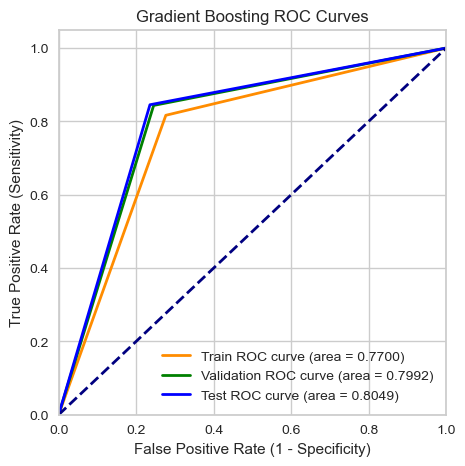

In [50]:
# Set line width
lw = 2

# Create a figure
plt.figure(figsize=[5, 5])

# Plot ROC curves
plt.plot(fpr_GB_tr, tpr_GB_tr, color='darkorange', lw=lw, 
         label='Train ROC curve (area = %0.4f)' % roc_auc_GB_tr)
plt.plot(fpr_GB_v, tpr_GB_v, color='green', lw=lw, 
         label='Validation ROC curve (area = %0.4f)' % roc_auc_GB_v)
plt.plot(fpr_GB_te, tpr_GB_te, color='blue', lw=lw, 
         label='Test ROC curve (area = %0.4f)' % roc_auc_GB_te)

# Add random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Gradient Boosting ROC Curves')

# Add legend
plt.legend(loc="lower right")

# Show plot
plt.show()



## 6.1.3. Random Forest

#### 6.1.3.1 Confusion matrix 

#### Training

In [51]:
# generar matriz de confusión
matrix_RF_train = confusion_matrix(yu_train, yu_train_pred_rf)

print(matrix_RF_train)

[[13710  1975]
 [ 1024 14767]]


#### Validation

In [52]:
# Create confusion matriz validation set
matrix_RF_val = confusion_matrix(yu_val, yu_val_pred_rf)

print(matrix_RF_val)

[[2369 1021]
 [ 654 2701]]


#### Test

In [53]:
# generar matriz de confusión
matrix_RF_test = confusion_matrix(yu_test, yu_test_pred_rf)

print(matrix_RF_test)

[[2385 1023]
 [ 566 2771]]


### 6.1.3.2 Metrics

In [54]:
# Confusion matrix values
tn_tr_RF, fp_tr_RF, fn_tr_RF, tp_tr_RF = matrix_RF_train.ravel()

# Calculate accuracy
accuracy_train_RF = (tp_tr_RF + tn_tr_RF) / (tp_tr_RF + tn_tr_RF + fp_tr_RF + fn_tr_RF)

# Calculate sensitivity (recall or true positive rate)
sensitivity_train_RF = tp_tr_RF / (tp_tr_RF + fn_tr_RF)

# Calculate specificity (true negative rate)
specificity_train_RF = tn_tr_RF / (tn_tr_RF + fp_tr_RF)

# Calculate precision
precision_train_RF = tp_tr_RF / (tp_tr_RF + fp_tr_RF)

# Print the results
print ('---------------------------------')
print ('          Training set')
print("Accuracy:", accuracy_train_RF)
print("Sensitivity:", sensitivity_train_RF)
print("Specificity:", specificity_train_RF)
print("Precision:", precision_train_RF)


# VALIDATION
# Confusion matrix values
tn_v_RF, fp_v_RF, fn_v_RF, tp_v_RF = matrix_RF_val.ravel()

# Calculate accuracy
accuracy_v_RF = (tp_v_RF + tn_v_RF) / (tp_v_RF + tn_v_RF + fp_v_RF + fn_v_RF)

# Calculate sensitivity (recall or true positive rate)
sensitivity_v_RF = tp_v_RF / (tp_v_RF + fn_v_RF)

# Calculate specificity (true negative rate)
specificity_v_RF = tn_v_RF / (tn_v_RF + fp_v_RF)

# Calculate precision
precision_v_RF = tp_v_RF / (tp_v_RF + fp_v_RF)

# Print the results
print ('---------------------------------')
print ('          Validation set')
print("Accuracy:", accuracy_v_RF)
print("Sensitivity:", sensitivity_v_RF)
print("Specificity:", specificity_v_RF)
print("Precision:", precision_v_RF)

# TEST
# Confusion matrix values
tn_te_RF, fp_te_RF, fn_te_RF, tp_te_RF = matrix_RF_test.ravel()

# Calculate accuracy
accuracy_te_RF = (tp_te_RF + tn_te_RF) / (tp_te_RF + tn_te_RF + fp_te_RF + fn_te_RF)

# Calculate sensitivity (recall or true positive rate)
sensitivity_te_RF = tp_te_RF / (tp_te_RF + fn_te_RF)

# Calculate specificity (true negative rate)
specificity_te_RF = tn_te_RF / (tn_te_RF + fp_te_RF)

# Calculate precision
precision_te_RF = tp_te_RF / (tp_te_RF + fp_te_RF)

# Print the results
print ('---------------------------------')
print ('          Test set')
print("Accuracy:", accuracy_te_RF)
print("Sensitivity:", sensitivity_te_RF)
print("Specificity:", specificity_te_RF)
print("Precision:", precision_te_RF)




---------------------------------
          Training set
Accuracy: 0.9047210573135087
Sensitivity: 0.9351529352162624
Specificity: 0.874083519285942
Precision: 0.8820332098912914
---------------------------------
          Validation set
Accuracy: 0.7516679021497406
Sensitivity: 0.8050670640834575
Specificity: 0.6988200589970501
Precision: 0.7256851155292854
---------------------------------
          Test set
Accuracy: 0.7644180874722016
Sensitivity: 0.8303865747677555
Specificity: 0.6998239436619719
Precision: 0.7303637322087506


### 6.1.3.3 AUC y ROC 

In [55]:
#TRAINING
# retorna false positive rate (fpr), true positive rate (tpr), y el threshold para esos valores 
fpr_RF_tr, tpr_RF_tr, _ = roc_curve(y_true= yu_train, y_score=yu_train_pred_rf)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_RF_tr = auc(x=fpr_RF_tr, y=tpr_RF_tr)
print ('           ROC Value')
print ('---------------------------------')
print('Training:', roc_auc_RF_tr)

#VALIDATION
fpr_RF_v, tpr_RF_v, _ = roc_curve(y_true= yu_val, y_score=yu_val_pred_rf)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_RF_v = auc(x=fpr_RF_v, y=tpr_RF_v)
print ('---------------------------------')
print('Validation:',roc_auc_RF_v)


#TEST
fpr_RF_te, tpr_RF_te, _ = roc_curve(y_true= yu_test, y_score=yu_test_pred_rf)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_RF_te = auc(x=fpr_RF_te, y=tpr_RF_te)
print ('---------------------------------')
print('Test:    ',roc_auc_RF_te)

           ROC Value
---------------------------------
Training: 0.9046182272511021
---------------------------------
Validation: 0.7519435615402538
---------------------------------
Test:     0.7651052592148636


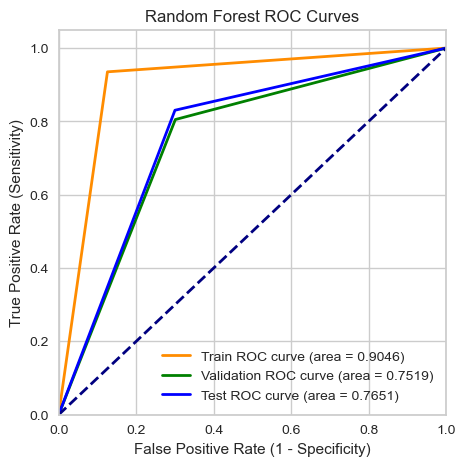

In [56]:
# Example data for ROC curves for Random Forest (RF) model
# These are placeholder values and should be replaced with actual data

# Set line width
lw = 2

# Create a figure
plt.figure(figsize=[5, 5])

# Plot ROC curves
plt.plot(fpr_RF_tr, tpr_RF_tr, color='darkorange', lw=lw, 
         label='Train ROC curve (area = %0.4f)' % roc_auc_RF_tr)
plt.plot(fpr_RF_v, tpr_RF_v, color='green', lw=lw, 
         label='Validation ROC curve (area = %0.4f)' % roc_auc_RF_v)
plt.plot(fpr_RF_te, tpr_RF_te, color='blue', lw=lw, 
         label='Test ROC curve (area = %0.4f)' % roc_auc_RF_te)

# Add random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Random Forest ROC Curves')

# Add legend
plt.legend(loc="lower right")

# Show plot
plt.show()

### 6.1.4. KNN

### 6.1.4.1 Confusion matrix

#### Before Hiperparameters

In [76]:
from sklearn.metrics import confusion_matrix
import numpy as np
# generar matriz de confusión
matrix_KNN_trainb = confusion_matrix(yu_train, yu_pred_tr_KNNb)
print('Confusion Matrix')
print('------------------')
print('    Training')
print('')
print(matrix_KNN_trainb)

print('------------------')
print('    Validation')
print('')
# generar matriz de confusión
matrix_KNN_valb = confusion_matrix(yu_val, yu_pred_v_KNNb)

print(matrix_KNN_valb)

print('------------------')
print('      Test')
print('')
matrix_KNN_testb = confusion_matrix(yu_test, yu_pred_te_KNNb)

print(matrix_KNN_testb)

Confusion Matrix
------------------
    Training

[[11703  3982]
 [ 2929 12862]]
------------------
    Validation

[[2513  877]
 [ 666 2689]]
------------------
      Test

[[2529  879]
 [ 692 2645]]


In [77]:
#TRAINING
# valores de la matriz de confusión
tn_tr_KNN, fp_tr_KNN, fn_tr_KNN, tp_tr_KNN = matrix_KNN_trainb.ravel()

# calcular la exactitud
accuracy_train_KNN = (tp_tr_KNN + tn_tr_KNN) / (tp_tr_KNN + tn_tr_KNN + fp_tr_KNN + fn_tr_KNN)

# calcular la sensibilidad (recall o true positive rate)
sensitivity_train_KNN = tp_tr_KNN / (tp_tr_KNN + fn_tr_KNN)

# calcular la especificidad (true negative rate)
specificity_train_KNN = tn_tr_KNN / (tn_tr_KNN + fp_tr_KNN)

# calcular la precisión
precision_train_KNN = tp_tr_KNN / (tp_tr_KNN + fp_tr_KNN)

# imprimir los resultados


print ('---------------------------------')
print ('          Training set')
print("Accuracy:", accuracy_train_KNN)
print("Sensitivity:", sensitivity_train_KNN)
print("Specificity:", specificity_train_KNN)
print("Precision:", precision_train_KNN)


# VALIDATION
# confusion matrix values
tn_v_KNN, fp_v_KNN, fn_v_KNN, tp_v_KNN = matrix_KNN_valb.ravel()

# calculate accuracy
accuracy_v_KNN = (tp_v_KNN + tn_v_KNN) / (tp_v_KNN + tn_v_KNN + fp_v_KNN + fn_v_KNN)

# calculate sensitivity (recall or true positive rate)
sensitivity_v_KNN = tp_v_KNN / (tp_v_KNN + fn_v_KNN)

# calculate specificity (true negative rate)
specificity_v_KNN = tn_v_KNN / (tn_v_KNN + fp_v_KNN)

# calculate precision
precision_v_KNN = tp_v_KNN / (tp_v_KNN + fp_v_KNN)


#Print Resuts
print ('---------------------------------')
print ('          Validation set')

print("Accuracy:", accuracy_v_KNN)
print("Sensitivity:", sensitivity_v_KNN)
print("Specificity:", specificity_v_KNN)
print("Precision:", precision_v_KNN)


# TEST
# valores de la matriz de confusión
tn_te_KNN, fp_te_KNN, fn_te_KNN, tp_te_KNN = matrix_KNN_testb.ravel()

# calcular la exactitud
accuracy_te_KNN = (tp_te_KNN + tn_te_KNN) / (tp_te_KNN + tn_te_KNN + fp_te_KNN + fn_te_KNN)

# calcular la sensibilidad (recall o true positive rate)
sensitivity_te_KNN = tp_te_KNN / (tp_te_KNN + fn_te_KNN)

# calcular la especificidad (true negative rate)
specificity_te_KNN = tn_te_KNN / (tn_te_KNN + fp_te_KNN)

# calcular la precisión
precision_te_KNN = tp_te_KNN / (tp_te_KNN + fp_te_KNN)

# imprimir los resultados
print ('---------------------------------')
print ('          Test set')
print("Accuracy:", accuracy_te_KNN)
print("Sensitivity:", sensitivity_te_KNN)
print("Specificity:", specificity_te_KNN)
print("Precision:", precision_te_KNN)

---------------------------------
          Training set
Accuracy: 0.7804358876604397
Sensitivity: 0.8145145969222976
Specificity: 0.7461268728084157
Precision: 0.7635953455236286
---------------------------------
          Validation set
Accuracy: 0.7712379540400297
Sensitivity: 0.8014903129657228
Specificity: 0.7412979351032448
Precision: 0.7540661805945037
---------------------------------
          Test set
Accuracy: 0.7670867309117865
Sensitivity: 0.792628109080012
Specificity: 0.7420774647887324
Precision: 0.7505675368898979


In [78]:

# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: las clases reales (0,1) o (-1,1)

fpr_KNN_tr, tpr_KNN_tr, _ = roc_curve(y_true= yu_train, y_score=yu_pred_tr_KNNb)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_KNN_tr = auc(x=fpr_KNN_tr, y=tpr_KNN_tr)
print ('           ROC Value')
print ('---------------------------------')

print('Training:',roc_auc_KNN_tr)


fpr_KNN_v, tpr_KNN_v, _ = roc_curve(y_true= yu_val, y_score=yu_pred_v_KNNb)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_KNN_v = auc(x=fpr_KNN_v, y=tpr_KNN_v)
print ('---------------------------------')
print('Validation:',roc_auc_KNN_v)


# retorna false positive rate (fpr), true positive rate (tpr), y el threshold para esos valores 
fpr_KNN_te, tpr_KNN_te, _ = roc_curve(y_true= yu_test, y_score=yu_pred_te_KNNb)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_KNN_te = auc(x=fpr_KNN_te, y=tpr_KNN_te)
print ('---------------------------------')
print('Test:',roc_auc_KNN_te)

           ROC Value
---------------------------------
Training: 0.7803207348653565
---------------------------------
Validation: 0.7713941240344838
---------------------------------
Test: 0.7673527869343721


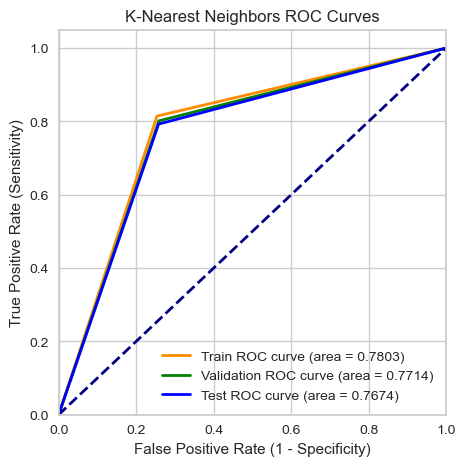

In [79]:
# Set line width
lw = 2

# Create a figure
plt.figure(figsize=[5, 5])

# Plot ROC curves
plt.plot(fpr_KNN_tr, tpr_KNN_tr, color='darkorange', lw=lw, 
         label='Train ROC curve (area = %0.4f)' % roc_auc_KNN_tr)
plt.plot(fpr_KNN_v, tpr_KNN_v, color='green', lw=lw, 
         label='Validation ROC curve (area = %0.4f)' % roc_auc_KNN_v)
plt.plot(fpr_KNN_te, tpr_KNN_te, color='blue', lw=lw, 
         label='Test ROC curve (area = %0.4f)' % roc_auc_KNN_te)

# Add random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('K-Nearest Neighbors ROC Curves')

# Add legend
plt.legend(loc="lower right")

# Show plot
plt.show()

### After Hiperparameters

In [61]:
from sklearn.metrics import confusion_matrix
import numpy as np
# generar matriz de confusión
matrix_KNN_train = confusion_matrix(yu_train, yu_pred_tr_KNN)
print('Confusion Matrix')
print('------------------')
print('    Training')
print('')
print(matrix_KNN_train)

print('------------------')
print('    Validation')
print('')
# generar matriz de confusión
matrix_KNN_val = confusion_matrix(yu_val, yu_pred_v_KNN)

print(matrix_KNN_val)

print('------------------')
print('      Test')
print('')
matrix_KNN_test = confusion_matrix(yu_test, yu_pred_te_KNN)

print(matrix_KNN_test)

Confusion Matrix
------------------
    Training

[[15685     0]
 [    1 15790]]
------------------
    Validation

[[3390    0]
 [   0 3355]]
------------------
      Test

[[3408    0]
 [   0 3337]]


### 6.1.4.2 Metrics training

In [62]:
#TRAINING
# valores de la matriz de confusión
tn_tr_KNN, fp_tr_KNN, fn_tr_KNN, tp_tr_KNN = matrix_KNN_train.ravel()

# calcular la exactitud
accuracy_train_KNN = (tp_tr_KNN + tn_tr_KNN) / (tp_tr_KNN + tn_tr_KNN + fp_tr_KNN + fn_tr_KNN)

# calcular la sensibilidad (recall o true positive rate)
sensitivity_train_KNN = tp_tr_KNN / (tp_tr_KNN + fn_tr_KNN)

# calcular la especificidad (true negative rate)
specificity_train_KNN = tn_tr_KNN / (tn_tr_KNN + fp_tr_KNN)

# calcular la precisión
precision_train_KNN = tp_tr_KNN / (tp_tr_KNN + fp_tr_KNN)

# imprimir los resultados


print ('---------------------------------')
print ('          Training set')
print("Accuracy:", accuracy_train_KNN)
print("Sensitivity:", sensitivity_train_KNN)
print("Specificity:", specificity_train_KNN)
print("Precision:", precision_train_KNN)


# VALIDATION
# confusion matrix values
tn_v_KNN, fp_v_KNN, fn_v_KNN, tp_v_KNN = matrix_KNN_val.ravel()

# calculate accuracy
accuracy_v_KNN = (tp_v_KNN + tn_v_KNN) / (tp_v_KNN + tn_v_KNN + fp_v_KNN + fn_v_KNN)

# calculate sensitivity (recall or true positive rate)
sensitivity_v_KNN = tp_v_KNN / (tp_v_KNN + fn_v_KNN)

# calculate specificity (true negative rate)
specificity_v_KNN = tn_v_KNN / (tn_v_KNN + fp_v_KNN)

# calculate precision
precision_v_KNN = tp_v_KNN / (tp_v_KNN + fp_v_KNN)


#Print Resuts
print ('---------------------------------')
print ('          Validation set')

print("Accuracy:", accuracy_v_KNN)
print("Sensitivity:", sensitivity_v_KNN)
print("Specificity:", specificity_v_KNN)
print("Precision:", precision_v_KNN)


# TEST
# valores de la matriz de confusión
tn_te_KNN, fp_te_KNN, fn_te_KNN, tp_te_KNN = matrix_KNN_test.ravel()

# calcular la exactitud
accuracy_te_KNN = (tp_te_KNN + tn_te_KNN) / (tp_te_KNN + tn_te_KNN + fp_te_KNN + fn_te_KNN)

# calcular la sensibilidad (recall o true positive rate)
sensitivity_te_KNN = tp_te_KNN / (tp_te_KNN + fn_te_KNN)

# calcular la especificidad (true negative rate)
specificity_te_KNN = tn_te_KNN / (tn_te_KNN + fp_te_KNN)

# calcular la precisión
precision_te_KNN = tp_te_KNN / (tp_te_KNN + fp_te_KNN)

# imprimir los resultados
print ('---------------------------------')
print ('          Test set')
print("Accuracy:", accuracy_te_KNN)
print("Sensitivity:", sensitivity_te_KNN)
print("Specificity:", specificity_te_KNN)
print("Precision:", precision_te_KNN)

---------------------------------
          Training set
Accuracy: 0.9999682297623587
Sensitivity: 0.9999366727882971
Specificity: 1.0
Precision: 1.0
---------------------------------
          Validation set
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
---------------------------------
          Test set
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0


### 6.1.4.3. AUC y ROC 

In [63]:

# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: las clases reales (0,1) o (-1,1)

fpr_KNN_tr, tpr_KNN_tr, _ = roc_curve(y_true= yu_train, y_score=yu_pred_tr_KNN)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_KNN_tr = auc(x=fpr_KNN_tr, y=tpr_KNN_tr)
print ('           ROC Value')
print ('---------------------------------')

print('Training:',roc_auc_KNN_tr)


fpr_KNN_v, tpr_KNN_v, _ = roc_curve(y_true= yu_val, y_score=yu_pred_v_KNN)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_KNN_v = auc(x=fpr_KNN_v, y=tpr_KNN_v)
print ('---------------------------------')
print('Validation:',roc_auc_KNN_v)


# retorna false positive rate (fpr), true positive rate (tpr), y el threshold para esos valores 
fpr_KNN_te, tpr_KNN_te, _ = roc_curve(y_true= yu_test, y_score=yu_pred_te_KNN)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_KNN_te = auc(x=fpr_KNN_te, y=tpr_KNN_te)
print ('---------------------------------')
print('Test:',roc_auc_KNN_te)

           ROC Value
---------------------------------
Training: 0.9999683363941485
---------------------------------
Validation: 1.0
---------------------------------
Test: 1.0


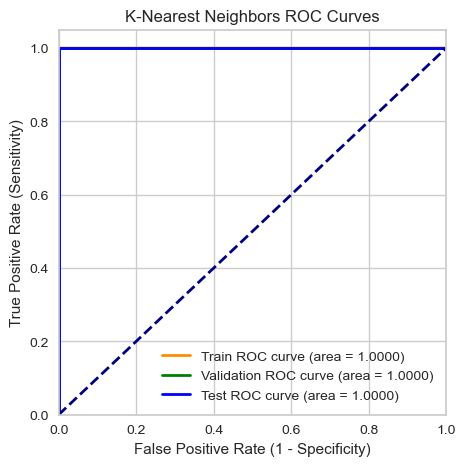

In [64]:


# Set line width
lw = 2

# Create a figure
plt.figure(figsize=[5, 5])

# Plot ROC curves
plt.plot(fpr_KNN_tr, tpr_KNN_tr, color='darkorange', lw=lw, 
         label='Train ROC curve (area = %0.4f)' % roc_auc_KNN_tr)
plt.plot(fpr_KNN_v, tpr_KNN_v, color='green', lw=lw, 
         label='Validation ROC curve (area = %0.4f)' % roc_auc_KNN_v)
plt.plot(fpr_KNN_te, tpr_KNN_te, color='blue', lw=lw, 
         label='Test ROC curve (area = %0.4f)' % roc_auc_KNN_te)

# Add random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('K-Nearest Neighbors ROC Curves')

# Add legend
plt.legend(loc="lower right")

# Show plot
plt.show()



> 6.2  Considering the costs of each type of error in this problem, select and justify the most adequate evaluation metric.

 ## 6.2. Justify the most adequate evaluation metric

It is crucial to strike a balance between the ability to accurately detect positive cases (sensitivity) and ensuring that positive predictions are accurate (precision). This involves finding the right balance between the two metrics to optimize model performance. This is why we will use the F1 Score to conclude all the algorithms.

### 6.2.1. F1 SCORE SVM

In [65]:

f1_score_tr_svm = (2*(precision_train_svm)*(sensitivity_train_svm))/((precision_train_svm)+(sensitivity_train_svm))
print ('---------------------------------')
print("Training: ", f1_score_tr_svm)
f1_score_v_svm = (2*(precision_val_svm)*(sensitivity_val_svm))/((precision_val_svm)+(sensitivity_val_svm))
print ('---------------------------------')
print("Validation: ",f1_score_v_svm)
f1_score_te_svm = (2*(precision_test_svm)*(sensitivity_test_svm))/((precision_test_svm)+(sensitivity_test_svm))
print ('---------------------------------')
print("Test: ",f1_score_te_svm)
print ('---------------------------------')

---------------------------------
Training:  0.7731010239951093
---------------------------------
Validation:  0.7647981742975325
---------------------------------
Test:  0.7749785284855426
---------------------------------


###  6.2.2. F1 SCORE Gradient Boost

In [66]:
f1_score_tr_GB = (2*(precision_train_GB)*(sensitivity_train_GB))/((precision_train_GB)+(sensitivity_train_GB))
print ('---------------------------------')
print("Training: ",f1_score_tr_GB)
f1_score_v_GB = (2*(precision_val_GB)*(sensitivity_val_GB))/((precision_val_GB)+(sensitivity_val_GB))
print ('---------------------------------')
print("Validation: ",f1_score_v_GB)
f1_score_te_GB = (2*(precision_test_GB)*(sensitivity_test_GB))/((precision_test_GB)+(sensitivity_test_GB))
print ('---------------------------------')
print("Test: ",f1_score_te_GB)
print ('---------------------------------')

---------------------------------
Training:  0.7809471899224806
---------------------------------
Validation:  0.8067274800456101
---------------------------------
Test:  0.8105157304984916
---------------------------------


###  6.2.3. F1 SCORE Random Forest

In [67]:
f1_score_tr_RF = (2*(precision_train_RF)*(sensitivity_train_RF))/((precision_train_RF)+(sensitivity_train_RF))
print ('---------------------------------')
print("Training: ",f1_score_tr_RF)
f1_score_v_RF = (2*(precision_v_RF)*(sensitivity_v_RF))/((precision_v_RF)+(sensitivity_v_RF))
print ('---------------------------------')
print("Validation: ",f1_score_v_RF)
f1_score_te_RF = (2*(precision_te_RF)*(sensitivity_te_RF))/((precision_te_RF)+(sensitivity_te_RF))
print ('---------------------------------')
print("Test: ",f1_score_te_RF)
print ('---------------------------------')

---------------------------------
Training:  0.9078166784495743
---------------------------------
Validation:  0.7633177900240214
---------------------------------
Test:  0.7771701023699341
---------------------------------


###  6.2.4. F1 SCORE KNN

In [68]:
f1_score_tr_KNN = (2*(precision_train_KNN)*(sensitivity_train_KNN))/((precision_train_KNN)+(sensitivity_train_KNN))
print ('---------------------------------')
print("Training: ",f1_score_tr_KNN)
f1_score_v_KNN = (2*(precision_v_KNN)*(sensitivity_v_KNN))/((precision_v_KNN)+(sensitivity_v_KNN))
print ('---------------------------------')
print("Validation: ",f1_score_v_KNN)
f1_score_te_KNN = (2*(precision_te_KNN)*(sensitivity_te_KNN))/((precision_te_KNN)+(sensitivity_te_KNN))
print ('---------------------------------')
print("Test: ",f1_score_te_KNN)

---------------------------------
Training:  0.999968335391533
---------------------------------
Validation:  1.0
---------------------------------
Test:  1.0


> 6.3 Select and justify the best algorithm using the evaluation metric selected and its performance in the training, validation, and test set. Analyze if the model i  underfitting, overfitting, or just right. 


### 6.3.1. Select and justify the best algorithm

The KNN algorithm has been shown to be highly effective in predicting heart disease, exhibiting exceptional F1 scores on the training, validation, and test sets (0.99, 1.0, and 1.0, respectively). These results suggest that the model has robustly learned the patterns present in the training data and can effectively generalize to new data sets, achieving perfect accuracy in classifying positive and negative cases. The perfect performance of the KNN algorithm on the validation set, with an F1 score of 1.0, is particularly outstanding, indicating its ability to accurately classify all cases in an independent dataset. The consistency between the high scores on the training and validation sets suggests that the model has not only memorized the training data, but has effectively captured underlying patterns generalizable to new instances. This successful generalization is essential to ensure that the model is applicable and accurate in real-world situations, reinforcing confidence in the KNN model's ability to make reliable predictions in Heart Disease classification.

### 6.3.2. Underfitting, overfitting or just right?

#### 6.3.2.1 F1 SCORE

In [69]:
# Analyze overfitting and underfitting based on F1 Score
if f1_score_tr_KNN > f1_score_v_KNN and f1_score_tr_KNN > f1_score_te_KNN:
    print("Possible overfitting: High F1 score in training but lower in validation and test.")
elif f1_score_tr_KNN < f1_score_v_KNN and f1_score_tr_KNN < f1_score_te_KNN:
    print("Possible underfitting: Low F1 score even in the training set.")
else:
    print("The model seems to be well adjusted based on F1 score.")

Possible underfitting: Low F1 score even in the training set.


In [70]:
if f1_score_tr_KNN + 0.05 < f1_score_v_KNN and f1_score_tr_KNN + 0.05 < f1_score_te_KNN:
    print("The F1 score in the training set is significantly lower than in validation and test, which could indicate underfitting.")
else:
    print("There is no significant evidence of underfitting based on the F1 scores.")

There is no significant evidence of underfitting based on the F1 scores.


#### 6.3.2.2 Acurracy

In [71]:
# Analyze overfitting and underfitting

# Check if the accuracy on the training set is higher than both the validation and test sets
if accuracy_train_KNN > accuracy_v_KNN and accuracy_train_KNN > accuracy_te_KNN:
    # If true, this suggests overfitting, where the model performs well on training data
    # but does not generalize well to unseen data (validation and test sets)
    print("Possible overfitting: high performance in training but lower in validation and test.")

# Check if the accuracy on the training set is lower than both the validation and test sets
elif accuracy_train_KNN < accuracy_v_KNN and accuracy_train_KNN < accuracy_te_KNN:
    # If true, this suggests underfitting, where the model is too simple and performs poorly
    # even on the training data, and consequently on the validation and test data
    print("Possible underfitting: low performance even in the training set.")

# If neither overfitting nor underfitting conditions are met
else:
    # This suggests that the model has a good balance and is likely well-adjusted
    # to the underlying patterns in the data, performing consistently across
    # training, validation, and test sets
    print("The model seems to be well adjusted.")


Possible underfitting: low performance even in the training set.


#### 6.3.2.3 Sennsitivity and Specificity

In [72]:
# Analyze overfitting and underfitting for Sensitivity
if sensitivity_train_KNN > sensitivity_v_KNN and sensitivity_train_KNN > sensitivity_te_KNN:
    print("Possible overfitting in Sensitivity: high in training but lower in validation and test.")
elif sensitivity_train_KNN < sensitivity_v_KNN and sensitivity_train_KNN < sensitivity_te_KNN:
    print("Possible underfitting in Sensitivity: low even in the training set.")
else:
    print("Sensitivity of the model well adjusted.")

# Analyze overfitting and underfitting for Specificity
if specificity_train_KNN > specificity_v_KNN and specificity_train_KNN > specificity_te_KNN:
    print("Possible overfitting in Specificity: high in training but lower in validation and test.")
elif specificity_train_KNN < specificity_v_KNN and specificity_train_KNN < specificity_te_KNN:
    print("Possible underfitting in Specificity: low even in the training set.")
else:
    print("Specificity of the model well adjusted.")

Possible underfitting in Sensitivity: low even in the training set.
Specificity of the model well adjusted.


> 6.4 Investigate how a random forest can be used to identify the most important predictor variables (feature selection).

                              Importance
Feature                                 
Age_Category                    0.227560
Weight_(kg)                     0.118662
General_Health                  0.103755
Height_(cm)                     0.079170
Green_Vegetables_Consumption    0.078246
Fruit_Consumption               0.074979
FriedPotato_Consumption         0.072059
Alcohol_Consumption             0.056392
BMI                             0.022422
Checkup                         0.020482
Arthritis                       0.019970
Smoking_History                 0.018597
Sex_Female                      0.016204
Exercise                        0.015736
Depression                      0.014210
Diabetes_Yes                    0.013997
Other_Cancer                    0.013729
Skin_Cancer                     0.012280
Diabetes_No                     0.008495
Sex_Male                        0.008029


<Figure size 400x400 with 0 Axes>

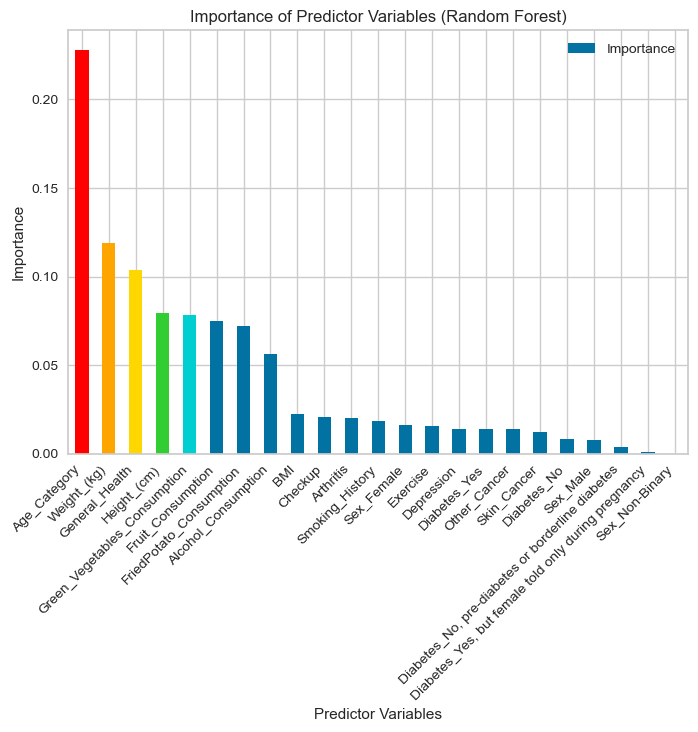

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score  # make sure this import is present
import matplotlib.pyplot as plt


# Ordena las importancias en orden descendente y establece 'Feature' como índice
rf_var = RandomForestRegressor(n_estimators=100, random_state=42)
rf_var.fit(Xu_train, yu_train)

# Evaluate the model's performance on the test data
y_pred = rf_var.predict(Xu_test)
r2_test = r2_score(yu_test, y_pred)  # Ensure that r2_score is the function from sklearn.metrics

# Get the importance of the predictor variables
importances = pd.DataFrame({'Feature': Xu_train.columns, 'Importance': rf_var.feature_importances_})

# Sort the importances in descending order and set 'Feature' as the index
importances = importances.sort_values('Importance', ascending=False).set_index('Feature')

# Print the top 20 most important variables
print(importances.head(20))

plt.figure(figsize=(4, 4))
ax = importances.plot(kind='bar')

# cambiar el color de la barra cada barra
ax.patches[0].set_facecolor('red')
ax.patches[1].set_facecolor('orange')
ax.patches[2].set_facecolor('gold')
ax.patches[3].set_facecolor('limegreen')
ax.patches[4].set_facecolor('darkturquoise')


# Visualiza la importancia de las variables con barras de colores diferentes
#plt.figure(figsize=(12, 6))

plt.title('Importance of Predictor Variables (Random Forest)')
plt.xlabel('Predictor Variables')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 1000x300 with 0 Axes>

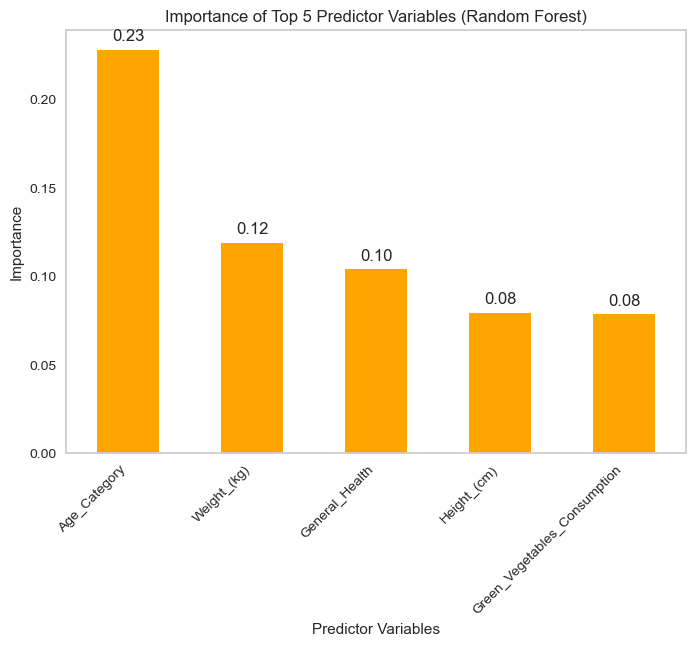

In [74]:
importances = pd.DataFrame({'Feature': Xu_train.columns, 'Importance': rf_var.feature_importances_})

# Ordena las importancias en orden descendente y selecciona las 5 principales
top_5_importances = importances.sort_values('Importance', ascending=False).head(5)

# Define una lista de colores para las barras
colors = ['orange', 'gold', 'limegreen', 'darkturquoise']

# Visualiza la importancia de las 5 principales variables
plt.figure(figsize=(10, 3))
ax = top_5_importances.plot(kind='bar', color=colors, legend=False)
ax.set_title('Importance of Top 5 Predictor Variables (Random Forest)')
ax.set_xlabel('Predictor Variables')
ax.set_ylabel('Importance')

# Configura las etiquetas del eje X para mostrar los nombres de las variables
ax.set_xticklabels(top_5_importances['Feature'], rotation=45, ha='right')

# Desactiva la cuadrícula de fondo
ax.grid(False)

# Añade el valor sobre cada barra
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

> ## References


Marktab. (2023, 11 julio). Preparación de datos para ML Studio (clásico) - Azure Architecture Center. Microsoft Learn. https://learn.microsoft.com/es-es/azure/architecture/data-science-process/prepare-data

Acero, J., & Rojas, K. (2023). Optimización de Hiperparámetros en Algoritmos de Aprendizaje Automático. Universidad Industrial de Santander
.
Asif, D., Bibi, M., Shoaib, M., & Mukheimer, A. (2023). Enhancing Heart Disease Prediction through Ensemble Learning Techniques with Hyperparameter Optimization. Algorithms. https://creativecommons.org/licenses/by/4.

0/
Ansarullah, S. I., Mohsin Saif, S., Abdul Basit Andrabi, S., Kumhar, S. H., Kirmani, M. M., & Kumar, D. P. (2022). An Intelligent and Reliable Hyperparameter Optimization Machine Learning Model for Early Heart Disease Assessment Using Imperative Risk Attributes. Journal of healthcare engineering, 2022, 9882288. https://doi.org/10.1155/2022/9882288 (Retraction published J Healthc Eng. 2023 Oct 11;2023:9871962)

Powers, D. M. W. (2011). Evaluation: from precision, recall and F-measure to ROC, informedness, markedness and correlation. Journal of Machine Learning Technologies, 2(1), 37-63.

Fawcett, T. (2006). An introduction to ROC analysis. Pattern Recognition Letters, 27(8), 861-874.
Hanley, J. A., & McNeil, B. J. (1982). The meaning and use of the area under a receiver operating characteristic (ROC) curve. Radiology, 143(1), 29-36.

Sokolova, M., & Lapalme, G. (2009). A systematic analysis of performance measures for classification tasks. Information Processing & Management, 45(4), 427-437.